# Telecommunication Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Display Formatting
from IPython.display import Markdown
import IPython.display as ipd
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

#Load the Cleaned Dataset

In [3]:
data=pd.read_csv('/content/drive/MyDrive/kaggle/churn/cleaned_churn_dataset.csv')
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,Contract_One year,Contract_Two year,InternetService_Fiber optic
0,0,0,0,1,0,0,25,1,False,False,False
1,1,0,0,41,1,0,25,0,True,False,False
2,0,0,1,52,1,0,19,0,False,False,False
3,0,0,0,1,1,0,76,1,True,False,False
4,1,0,0,67,1,0,51,0,False,False,True


## Split the data into training and testing set

In [4]:
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Combine features and target for saving
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save to CSV
train_df.to_csv("telecom_churn_train.csv", index=False)
test_df.to_csv("telecom_churn_test.csv", index=False)

print("Training and test files created.")
print(f"Training set: {train_df.shape[0]} rows")
print(f"Test set: {test_df.shape[0]} rows")


Training and test files created.
Training set: 5634 rows
Test set: 1409 rows


## Feature Scaling for K-Means Clustering

In [5]:
# Load the datasets
train_df = pd.read_csv("telecom_churn_train.csv")
test_df = pd.read_csv("telecom_churn_test.csv")

# Separate features and target
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test)        # Use same scaling parameters

# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display scaled train and test samples
ipd.display(Markdown("### Scaled Training Data Sample"))
ipd.display(X_train_scaled_df.head())

ipd.display(Markdown("### Scaled Test Data Sample"))
ipd.display(X_test_scaled_df.head())



### Scaled Training Data Sample

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic
0,0.981708,-0.442634,1.535438,-1.276682,0.330235,-0.847471,-0.149881,-0.513334,1.768466,-0.878781
1,-1.018633,-0.442634,-0.651280,-0.096089,0.330235,-0.847471,-0.315125,1.948049,-0.565462,-0.878781
2,-1.018633,2.259205,-0.651280,0.555273,0.330235,1.179982,1.172071,-0.513334,-0.565462,1.137940
3,0.981708,-0.442634,-0.651280,0.433143,0.330235,-0.847471,0.048412,1.948049,-0.565462,-0.878781
4,0.981708,-0.442634,-0.651280,-1.276682,0.330235,1.179982,-1.471834,-0.513334,1.768466,1.137940


### Scaled Test Data Sample

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic
0,-1.018633,2.259205,-0.651280,-1.235972,0.330235,-0.847471,0.643290,1.948049,-0.565462,1.137940
1,0.981708,-0.442634,-0.651280,-0.503190,0.330235,1.179982,-0.017686,-0.513334,-0.565462,1.137940
2,0.981708,-0.442634,1.535438,0.433143,0.330235,-0.847471,-1.504883,1.948049,-0.565462,-0.878781
3,0.981708,-0.442634,1.535438,0.473853,-3.028147,1.179982,-0.348174,-0.513334,-0.565462,1.137940
4,0.981708,-0.442634,-0.651280,-0.543900,0.330235,-0.847471,-1.471834,-0.513334,1.768466,-0.878781


## Identifying the Optimal Number of Clusters

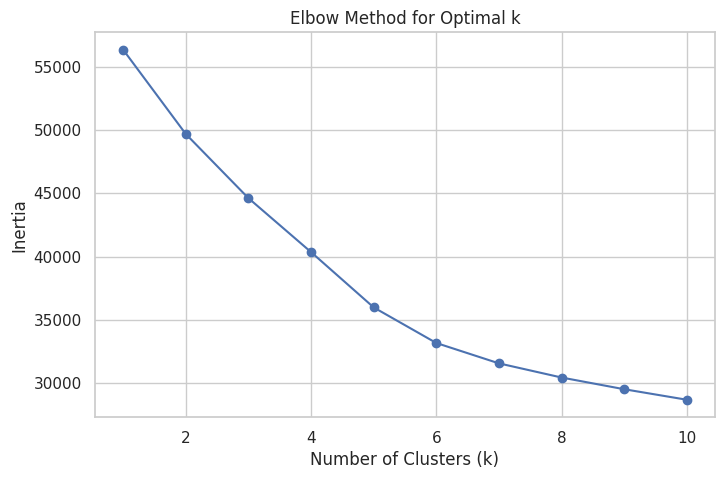

In [6]:
# Using scaled training features for clustering
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


## Training the K-Means Model

In [7]:
#The optimal number of clusters is 4.
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model on training data
kmeans_model.fit(X_train_scaled_df)

# Predict cluster labels
train_clusters = kmeans_model.predict(X_train_scaled_df)
test_clusters = kmeans_model.predict(X_test_scaled_df)

# Add cluster labels to DataFrames
X_train_scaled_df['Cluster'] = train_clusters
X_test_scaled_df['Cluster'] = test_clusters

ipd.display(Markdown("### Training Data with Cluster Labels"))
ipd.display(X_train_scaled_df.tail())


### Training Data with Cluster Labels

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,Cluster
5629,-1.018633,-0.442634,1.535438,-0.951001,0.330235,-0.847471,-0.315125,-0.513334,-0.565462,-0.878781,0
5630,0.981708,-0.442634,-0.651280,-1.235972,0.330235,-0.847471,-0.348174,-0.513334,1.768466,-0.878781,1
5631,0.981708,-0.442634,-0.651280,-0.828871,0.330235,-0.847471,-0.249028,-0.513334,-0.565462,-0.878781,2
5632,0.981708,-0.442634,1.535438,0.107462,0.330235,1.179982,-1.471834,-0.513334,-0.565462,1.137940,0
5633,-1.018633,-0.442634,1.535438,0.026042,0.330235,1.179982,-1.471834,-0.513334,1.768466,-0.878781,1


## Saving the K-means Model

In [8]:
import joblib
joblib.dump(kmeans_model, 'kmeans_model.pkl')


['kmeans_model.pkl']

## Visualising Clusters

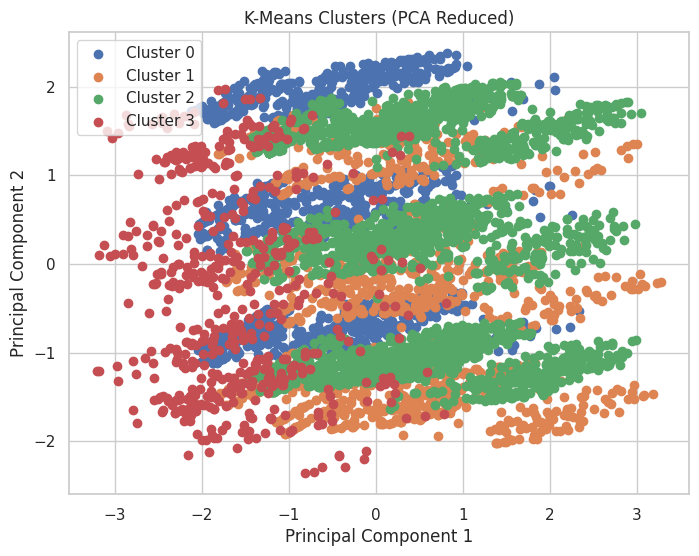

In [9]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
train_pca = pca.fit_transform(X_train_scaled_df.drop('Cluster', axis=1))

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=train_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = train_clusters

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')

plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()